In [33]:
import pandas as pd
import numpy as np
import scipy
import random
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline

Color generator(для генерации рандомных цветов)

In [34]:
symbols = ['0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F']
def color_generator():
    color = '#'
    for i in range(6):
        index = 0
        for j in xrange(1000) :
            index = random.randint(0, 15)
        color += (symbols[index])
    return color

Как мы знаем , оценкой максимального правдоподобия для $\theta$ в модели $N(\theta, 1)$ с известной дисперсией, является выборочное среднее, то есть $\overline{X}$. она является так же асимптотически нормальной оценкой $\theta$(это верно по ЦПТ) Найдем для всех n < 100 оценки для подвыборок

Сопряженным априорным к нашему распределению будет тоже нормальное с параметрами $N(\mu_{0}, \sigma^{2}_{0})$ Гиперпараметрами апостериорного распределения будут 

$\mu = \frac {\frac{\mu_{0}}{\sigma^{2}_{0}} + \frac{\sum^{n}_{i = 1}X_{i}} {\sigma^2}} {\frac{1}{\sigma_{0}^2} + \frac{n}{\sigma^2}}$ 
В этом можно убедиться собственноручно, посмотрев, как выглядит апостериорное распределение, т.е. 

$p(\theta|X) = \frac{p(X|\theta) \cdot p(\theta)}{\int_{\theta \in \Theta}p(X|\theta) \cdot p(\theta) d\theta}$

А Байесовской оценкой параметра $\theta$ является условное математическое ожидание E($\theta$ | X). Это верно, если считать, что мы используем квадратичную функцию потерь: $g(x,y) = (x - y)^2$ .

Наша задача найти УМО:

$\hat{\theta} = E(\theta | X)$

$p(\theta | X)$ - апостериорная плотность. Мы знаем, что апостериорное распределение $\sim$ N($\frac {\frac{\mu_{0}}{\sigma^{2}_{0}} + \frac{\sum^{n}_{i = 1}X_{i}} {\sigma^2}} {\frac{1}{\sigma_{0}^2} + \frac{n}{\sigma^2}}, \sigma^2_{new}$)

А у случайной величины, распределенной нормально матожидание равно $\mu$ ,которое мы уже знаем, т.е. Байессовской оценкой параметра $\theta$ будет первый из гиперпараметров апостериорного распределения!

$\hat{\theta} = \frac {\frac{\mu_{0}}{\sigma^{2}_{0}} + \frac{\sum^{n}_{i = 1}X_{i}} {\sigma^2}} {\frac{1}{\sigma_{0}^2} + \frac{n}{\sigma^2}} $


Это параметры для априорного распределения (0, 1), (0, 100), (10, 1), (10, 100).

In [35]:
parameters = zip([0,0,10,10], [1,100,1,100])

Данная функция как раз считает Байесовскую оценку:
<ul style="list-style-type:square">
    <li>Генерируем выборку из стандартного нормального распределения размера 100</li>
    <li>Получаем массив частичных сумм для выборки</li>
    <li>Считаем массив средних $\overline{X}$</li>
    <li>Далее, для каждой пары параметров в отдельности считаем Байесовскую оценку параметра $\theta$ и дописываем ее в конец списка evalas</li>
</ul>

In [36]:
def make_evals(mus, sigmas) :
    selection = scipy.stats.norm.rvs(size=100)
    sumis = np.cumsum(selection)
    meanas = sumis
    for i in range(100) :
        meanas[i] = meanas[i] / (i + 1)
    evalas = []
    for i in range(len(mus)) :
        evalas.append(evaluate(mus[i], selection, sigmas[i]))
    return meanas, evalas

А эта функция просто считает саму оценку для конкретных параметров априорного распределения в соотвествии с формулой, которая была выведена пару ячеек выше

In [37]:
def evaluate(mu0, select, sigma0, sigma=1) :
    sumka = np.cumsum(select)
    return [(float(mu0)/float(sigma0 ** 2) + float(sumka[n]) / float(sigma ** 2)) / ((1. / float(sigma0 ** 2)) + (float(n + 1) / float(sigma ** 2))) for n in range(100)]

Получаем оценку Максимального правдоподобия и Байесовские оценки

In [38]:
means, evals = make_evals([0.,0.,10.,10.], [1.,100.,1.,100.])

Далее, опишем функцию, которая нам нарисует график модуля разности нашей оценки от действительного(реального) значения параметра $\theta$. Для удобства нариуем график Оценки максимального правдоподобия пунктиром, чтобы было проще отличитть ее от Байесовских оценок

In [39]:
def draw_all(means, evals) :
    plt.figure(figsize=(15,5))
    dots = range(1,101)
    plt.plot(dots, map(abs,means), '--', color=color_generator(), label='MLE')
    for i in range(len(evals)):
        plt.plot(dots, map(abs, evals[i]), color=color_generator(), label='param = ' + str(parameters[i]))
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0.)
    plt.ylim(0,2)
    plt.grid(True)

На графике видно, что многие из оценок практически не отличаются, но хуже себя ведет набор параметров (10,1)

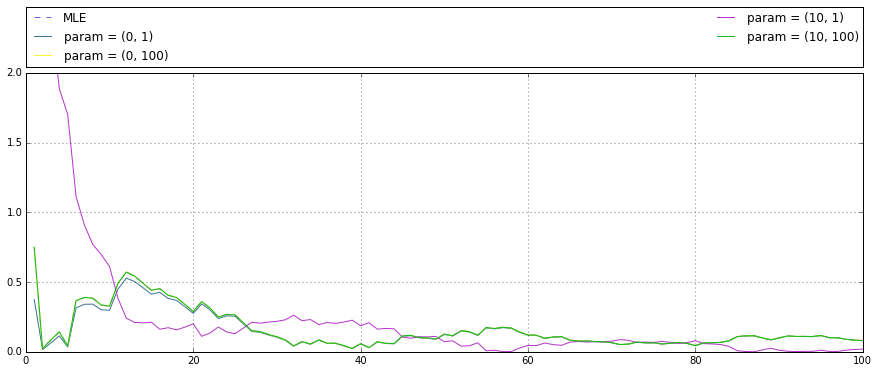

In [40]:
draw_all(means, evals)

Аналогичные исследования произведем для модели 𝑁 (0, 𝜃). В этом случае возьмем следующие параметры сдвига и масштаба для априорного распределения: (1, 1), (1, 100), (10, 1), (10, 100).
Проделаем все аналогично предыдущему пункту, но теперь априорное распределение будет из семейства обратного к Гамма распределению с параметрами $\sim \Gamma_{inv}(\alpha + \frac{n}{2}, \frac{2\lambda + \sum{X^{2}_{i}}}{2})$
Так как обратное к гамма распределению имеет матожидание равное $\frac{\beta}{\alpha - 1}$
То его матожиданием будет $E(\theta | X) $= 
$\frac{2\lambda+\sum X_i^2}{2\alpha+{n} - 2}$



По аналогии с предыдущим пунктом, посчитаем частичные суммы элементов выборки и их квадратов, т.к. ОМП для $\sigma^2$ - выборочная дисперсия $S^2 = \overline{X^2} - \overline{X}^2$

In [41]:
def make_evals_sigma(alphas, lambdas) :
    selection = scipy.stats.norm.rvs(size=100)
    sums = np.cumsum(selection)
    squared_sum = np.cumsum(map(lambda x : x ** 2, selection))
    sq_sum_mean = squared_sum
    for i in range(len(sq_sum_mean)):
        sq_sum_mean[i] = sq_sum_mean[i] / float(i + 1.)
    means = sums
    for i in range(100) :
        means[i] = means[i] / (i + 1.)
    evals = []
    for i in range(len(alphas)) :
        evals.append(evaluate_sigma(alphas[i], lambdas[i], selection))
    return means, evals, sq_sum_mean

In [42]:
def evaluate_sigma(alpha, lambd, selection) :
    sq = np.cumsum(map(lambda x : x ** 2, selection))
    return [(float(2. * float(lambd) + float(sq[n])) / (2. * float(alpha) + n + 1. - 2.)) for n in range(100)]

In [43]:
means_sigma, evals_sigma, sq_sum_mean = make_evals_sigma([1.,1.,10.,10.],[1.,100.,1.,100.])

In [47]:
S_kvadrat = sq_sum_mean - means_sigma ** 2

посчитав все оценки, перейдем к построению графиков модулей разности оценки от реального значения $\theta = 1$

Cнова обозначим пунктиром ОМП

In [48]:
parameters_sigma = zip([1,1,10,10],[1,100,1,100])

In [49]:
def draw_all_sigma(S_kvadrat, evals) :
    plt.figure(figsize=(15,5))
    dots = range(1,101)
    plt.plot(dots, map(abs,S_kvadrat - 1.), '--',color=color_generator(), label='MLE')
    for i in range(len(evals)):
        plt.plot(dots, map(lambda x : abs(x - 1.), evals[i]), color=color_generator(), label='param = ' + str(parameters_sigma[i]))
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0.)
    plt.ylim(0,4)
    plt.grid(True)

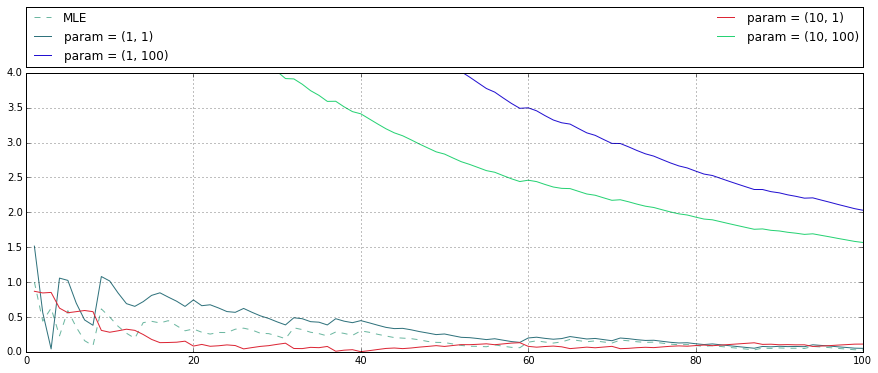

In [51]:
draw_all_sigma(S_kvadrat, evals_sigma)

Из графиков видно, что оценки с априорным распределением (1,1) и (10, 1), а так же ОМП выглядят очень хорошо, в отличие от (1,100) и (10,100)